<a href="https://colab.research.google.com/github/adamazanos/vidgame_sales_prediction_model/blob/main/Video_Game_Sales_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video game sales prediction

Projek bertujuan untuk menganalisa sales video game berdasarkan sales, dan membuat model Machine learning dengan LSTM


Projek ini mengikuti guide dari https://thecleverprogrammer.com/2021/05/28/video-game-sales-prediction-model-with-python/ 


Data set :

Video game sales = https://www.kaggle.com/datasets/gregorut/videogamesales?select=vgsales.csv dan di pindah sumber datanya kedalam github = https://raw.githubusercontent.com/adamazanos/vidgame_sales_prediction_model/main/vgsales.csv


**Tahapan - tahapan**
1. Persiapan dataset
2. Drop data null
3. Analisa data
  1. top 10 best-selling game categories
  2. Pengecekan korelasi
4. Pembuatan Training Video Game Sales Prediction Model

#1. Persiapan dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/adamazanos/vidgame_sales_prediction_model/main/vgsales.csv')
print(data.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [ ]:
print(data.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


#2. Drop data null

In [ ]:
data = data.dropna()

In [ ]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
print(data.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


#3. Analisa data

##1. top 10 best-selling game categories

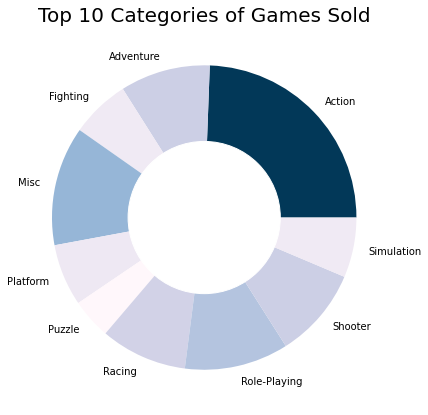

In [ ]:
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

In [ ]:
print(data.corr())

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178027 -0.400315 -0.379137 -0.269323    -0.332735   
Year          0.178027  1.000000 -0.091285  0.006108 -0.169387     0.041128   
NA_Sales     -0.400315 -0.091285  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.006108  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323 -0.169387  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.041128  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975 -0.074647  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
Year             -0.074647  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000  


## 2. Pengecekan korelasi

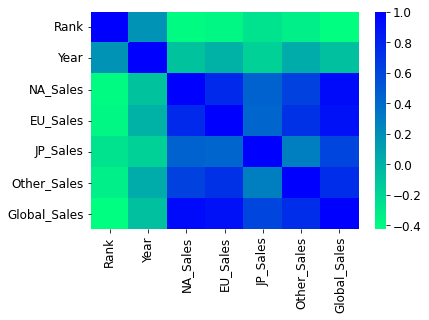

In [ ]:
sns.heatmap(data.corr(), cmap="winter_r")
plt.show()

#4. Pembuatan model Training Video Game Sales Prediction Model

In [ ]:
x = data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)